In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [3]:
ArtBank = 'images'
Art_Categories = ['abstract','animal-painting','cityscape','flower-painting','landscape', 'portrait', 'still-life']
Image_size=256#70

In [4]:
training_data=[]
def creating_training_data():
    for category in Art_Categories:
        path=os.path.join(ArtBank, category)
        class_num=Art_Categories.index(category)
        i=0
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(Image_size,Image_size))
                training_data.append([new_array/255,class_num])#divided by 255
            except Exception as e:
                pass
            if i==1999:#999
                break
            i+=1

creating_training_data()

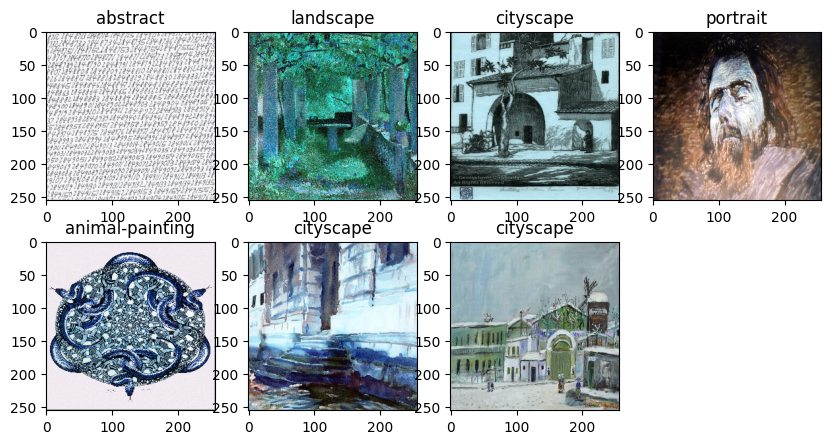

In [16]:
#Display images after changing the dimensions
import random
plt.figure(figsize=(10,5))
for i in range(len(Art_Categories)):
    plt.subplot(2,4,i+1)
    r = random.randint(1, len(training_data))
    plt.imshow(training_data[3*i+2+r][0])
    plt.title(Art_Categories[training_data[3*i+2+r][1]])

In [17]:
#seperating the images and the labels
lenofimage = len(training_data)
X_Images=[]
y_Labels=[]

for categories, label in training_data:
    X_Images.append(categories)
    y_Labels.append(label)
X_Images= np.array(X_Images).reshape(lenofimage,-1)
#X = X/255.0
y_Labels=np.array(y_Labels)

In [18]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Images,y_Labels, test_size=0.2, random_state=42)

In [9]:
#set up the model
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma='auto')

In [ ]:
# train the model
svc.fit(X_train, y_train)

In [ ]:
#predict labels for test data
y2 = svc.predict(X_test)

In [ ]:
y2.shape

In [ ]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training data is",accuracy_score(y_test,y2))

In [ ]:
#Precision recall and F1
from sklearn.metrics import classification_report
print("Accuracy on training data is",classification_report(y_test,y2))

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_u = to_categorical(y_test, num_classes = len(Art_Categories))
import seaborn as sns

Y_true = np.argmax(y_u,axis = 1) 

confusion_matrix_1 = confusion_matrix(Y_true, y2) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix_1, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [4]:
#imports used for next section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
%matplotlib inline
import os
# import tensorflow as tf

In [22]:
# Art_Categories = ['abstract','animal-painting','cityscape','flower-painting','landscape', 'portrait', 'still-life']
# Image_size=512 

In [5]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

ArtBank = 'images'
Art_Categories = ['abstract','genre-painting','landscape', 'portrait']
# create directories
dataset_home = 'art_dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    for labldir in Art_Categories:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.10
# copy training dataset images into subdirectories
src_directory = 'images/'
# for file in listdir(src_directory):
#     src = src_directory + '/' + file
#     dst_dir = 'train/'
#     if random() < val_ratio:
#         dst_dir = 'test/'
    # if file.startswith('cat'):
    #     dst = dataset_home + dst_dir + 'cats/'  + file
    #     copyfile(src, dst)
    # elif file.startswith('dog'):
    #     dst = dataset_home + dst_dir + 'dogs/'  + file
    #     copyfile(src, dst)

for category in Art_Categories:
    path=os.path.join(ArtBank, category)
    for img in listdir(path):
        src = path + '/' + img
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        dst = dataset_home + dst_dir + category + '/'  + img
        copyfile(src, dst)

In [16]:
#Stroing the images as matrices with 3 components one for each colour aspect
ArtBank = 'images'

# Art_Categories = ['abstract','animal-painting','cityscape','flower-painting','landscape', 'portrait', 'still-life']
Art_Categories = ['abstract','genre-painting','landscape', 'portrait']
Image_size=128
training_data=[]
def creating_training_data():
    for category in Art_Categories:
        path=os.path.join(ArtBank, category)
        class_num=Art_Categories.index(category)
        i=0
        ld = sorted(os.listdir(path))
        print(path)
        for img in ld:
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(Image_size,Image_size))
                training_data.append([new_array/255,class_num])#divided by 255
            except Exception as e:
                pass
            if i==2999: # data size for category
                break
            if i%(len(ld) / 10)==0:
                print(f"{(i/2999) * 100}%",end="\r")
            i+=1

creating_training_data()

images\abstract
images\genre-painting
images\landscape
images\portrait69%


In [17]:
#split the images from the labels
Xr_images = []
yr_labels = []
for categories, label in training_data:
    Xr_images.append(categories)
    yr_labels.append(label)


In [18]:
#Test train split
X_Images = np.array(Xr_images, dtype = 'float32')
from tensorflow.keras.utils import to_categorical 
y_Labels = to_categorical(yr_labels, num_classes = len(Art_Categories))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Images, y_Labels, test_size=0.1, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=(0.1), random_state=1) # 0.111 x 0.9 = 0.1
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (9720, 128, 128, 3)
x_test shape (1080, 128, 128, 3)
y_train shape (9720, 4)
y_test shape (1080, 4)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory('art_dataset/train/',
 class_mode='categorical', batch_size=64, target_size=(256, 256))
test_it = datagen.flow_from_directory('art_dataset/test/',
 class_mode='categorical', batch_size=64, target_size=(256, 256))

In [19]:
#Define neural networks structure
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (Image_size,Image_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(Art_Categories), activation = "softmax"))

c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# define other model
# define cnn model
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256, 256, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(4, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [13]:
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterator
    train_it = datagen.flow_from_directory('art_dataset/train/',
    class_mode='categorical', batch_size=64, target_size=(256, 256))
    test_it = datagen.flow_from_directory('art_dataset/test/',
    class_mode='categorical', batch_size=64, target_size=(256, 256))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    
    model.save('other_approach_model.keras')
    model.save('other_approach_model.h5')
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

In [ ]:
run_test_harness()

In [20]:
#The choice of gradient descent
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [21]:
#Choosing our loss function
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
epochs = 50  # optimal choice
batch_size = 32

In [23]:
checkpoint_filepath = 'ckpt/checkpointfour.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# fit model from generator
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=epochs, verbose=0)

In [24]:
#Show how validation loss changes
history = model.fit(X_train,Y_train,
                    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[model_checkpoint_callback])

Epoch 1/50
295/303 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3845 - loss: 1.9174

c:\Users\micha\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


303/303 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.3864 - loss: 1.9027 - val_accuracy: 0.5333 - val_loss: 1.1953
Epoch 2/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5599 - loss: 1.0530 - val_accuracy: 0.6296 - val_loss: 0.9452
Epoch 3/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.6059 - loss: 0.9559 - val_accuracy: 0.6509 - val_loss: 0.8983
Epoch 4/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.6387 - loss: 0.8625 - val_accuracy: 0.6009 - val_loss: 0.9629
Epoch 5/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.6744 - loss: 0.8102 - val_accuracy: 0.6593 - val_loss: 0.8224
Epoch 6/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6936 - loss: 0.7501 - val_accuracy: 0.6324 - val_loss: 0.9141
Epoch 7/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7038 - loss: 0.7251 - val_accuracy: 0.6991 - val_loss: 0.7540
Epoch 8/50
303/303 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.7269 - loss: 0.6782 - val_accurac

In [26]:
model.save('Art_Classification_four.h5')
model.save('Art_Classification_four.keras')

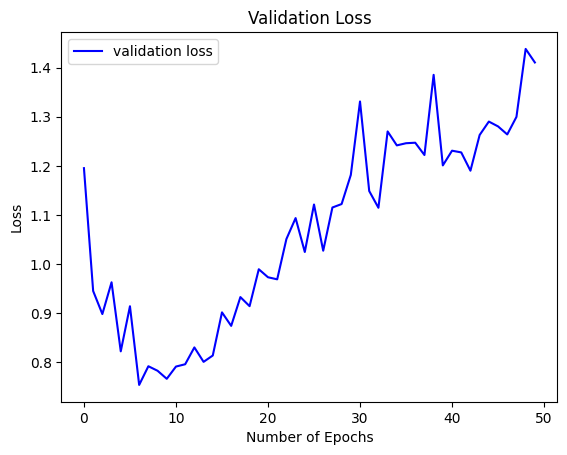

In [27]:
#Plot validation loss
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

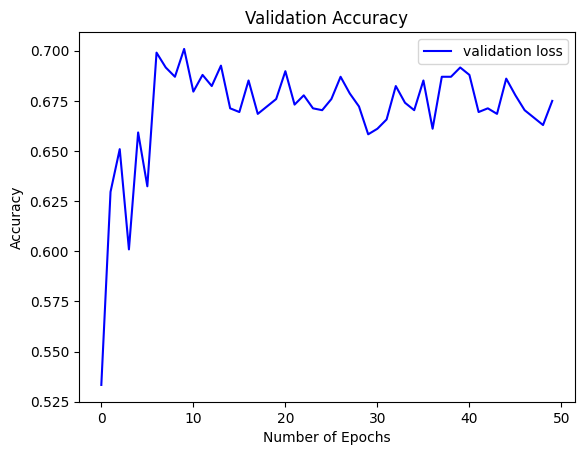

In [28]:
plt.plot(history.history['val_accuracy'], color='b', label="validation loss")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


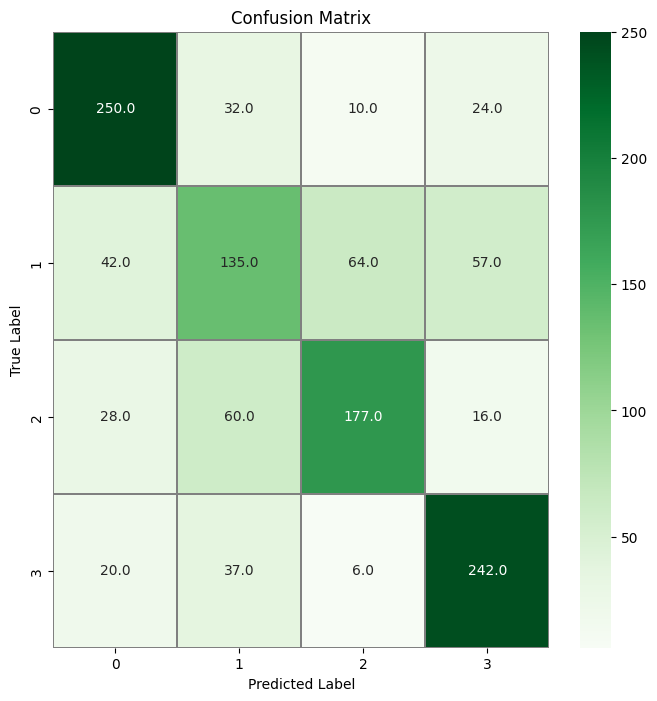

In [29]:
#Confusion matrix
import seaborn as sns

Y_pred = model.predict(X_test)
 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_test,axis = 1) 

confusion_matrix_1 = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix_1, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy on training data is",accuracy_score(Y_true,Y_pred_classes))


Accuracy on training data is 0.67


In [48]:

# %pip install graphviz
# %pip install pydot
from tensorflow.keras.utils import plot_model

# Assuming your model is stored in the 'model' variable
plot_model(model, to_file='model.png', show_shapes=True)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [49]:
from tensorflow.keras.models import load_model
loadedModel = load_model('ckpt/checkpointfour.model.keras')

In [50]:
Y_pred = loadedModel.predict(X_test)
 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_test,axis = 1) 

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


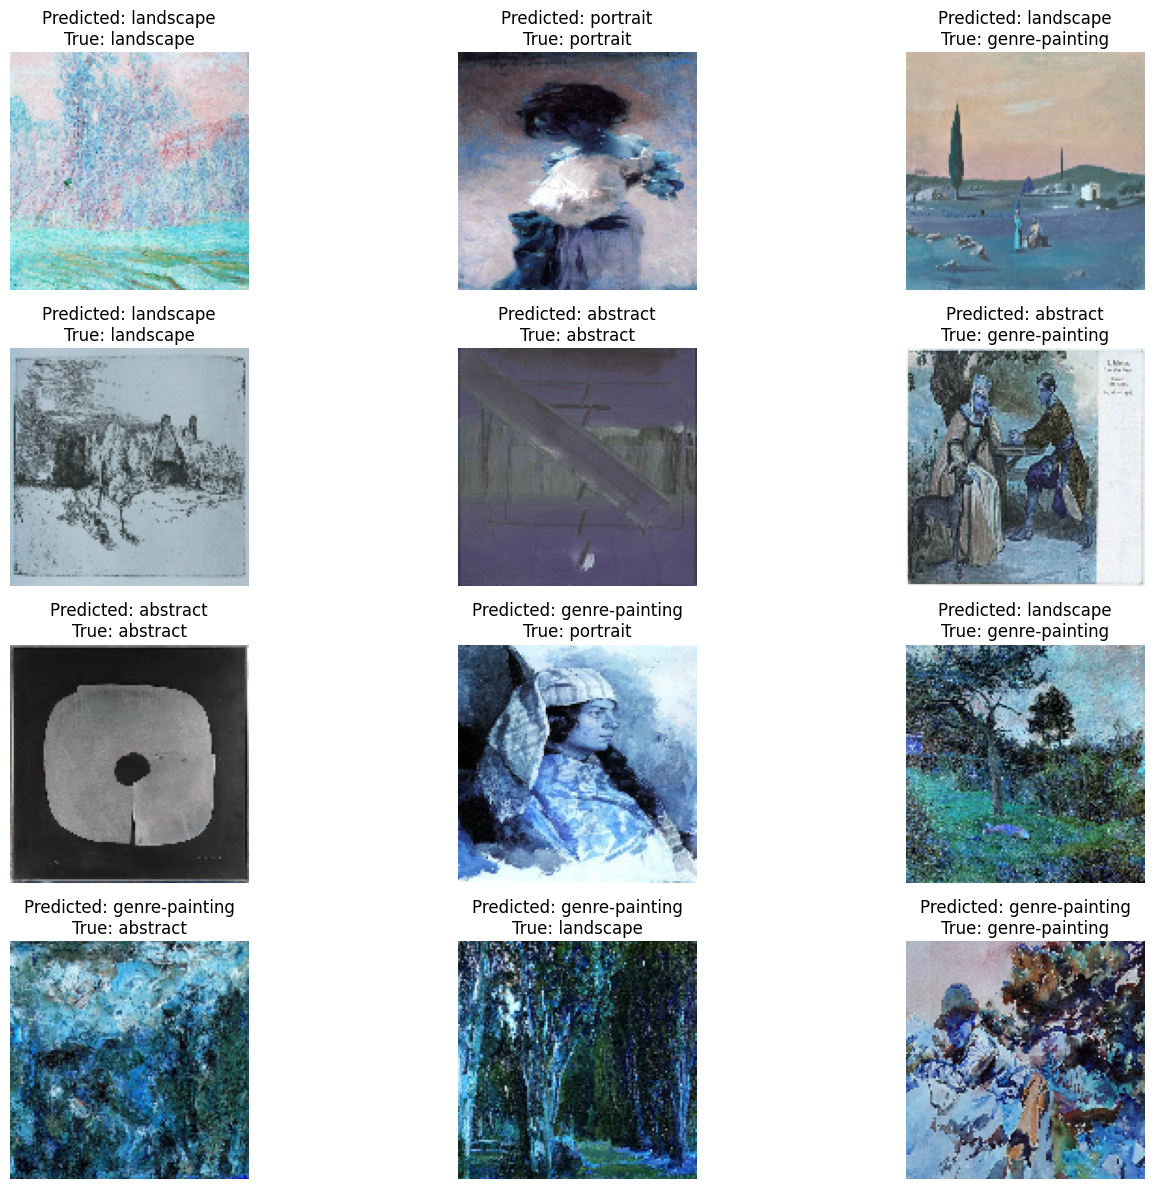

In [74]:
import matplotlib.pyplot as plt

# Select a few indices of test images to plot (modify as needed)
import random

# Generate 10 random numbers between 0 (inclusive) and 1 (exclusive)
image_indices = [random.randint(0, len(Y_pred_classes)) for _ in range(12)]

# Get the predicted and true class labels for these images
predicted_classes = Y_pred_classes[image_indices]
true_classes = Y_true[image_indices]

# Get class names from Art_Categories (assuming it's defined elsewhere)
class_names = Art_Categories

# Calculate the number of columns and rows for a 3xN grid
num_images = len(image_indices)
num_cols = 3
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Add a row if not perfectly divisible

# Create a figure for plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Adjust figsize for better visualization

# Flatten the axes for easier iteration
axes_flat = axes.flatten()

# Loop through the selected indices and plot images with labels
for i, (index, predicted_class, true_class) in enumerate(zip(image_indices, predicted_classes, true_classes)):
  image = X_test[index]  # Assuming your test images are stored in X_test

  # Rescale the image back to 0-255 range if necessary (depending on preprocessing)
  image = image * 255

  axes_flat[i].imshow(image.astype(int))
  axes_flat[i].set_title(f"Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_class]}")
  axes_flat[i].axis('off')  # Hide axes for cleaner visualization

# Tight layout to prevent overlapping labels
plt.tight_layout()

# Display the plotted images
plt.show()


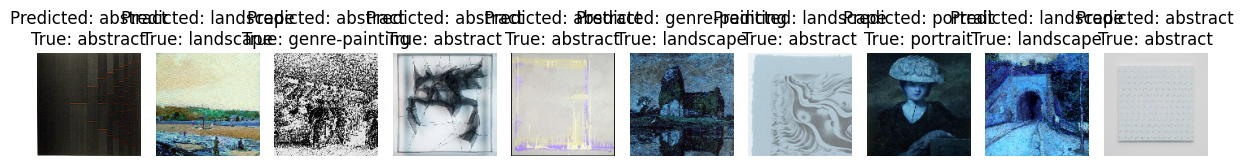

In [67]:
import matplotlib.pyplot as plt

# Select a few indices of test images to plot (modify as needed)
import random

# Generate 10 random numbers between 0 (inclusive) and 1 (exclusive)
image_indices = [random.randint(0, len(Y_pred_classes)) for _ in range(10)]

# Get the predicted and true class labels for these images
predicted_classes = Y_pred_classes[image_indices]
true_classes = Y_true[image_indices]

# Get class names from Art_Categories (assuming it's defined elsewhere)
class_names = Art_Categories

# Create a figure for plotting
fig, axes = plt.subplots(1, len(image_indices), figsize=(12, 8))  # Adjust figsize for better visualization

# Loop through the selected indices and plot images with labels
for i, (index, predicted_class, true_class) in enumerate(zip(image_indices, predicted_classes, true_classes)):
    image = X_test[index]  # Assuming your test images are stored in X_test

    # Rescale the image back to 0-255 range if necessary (depending on preprocessing)
    image = image * 255

    axes[i].imshow(image.astype(int))
    axes[i].set_title(f"Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_class]}")
    axes[i].axis('off')  # Hide axes for cleaner visualization

# Tight layout to prevent overlapping labels
plt.tight_layout()

# Display the plotted images
plt.show()


(5, 128, 128, 3)


TypeError: only integer scalar arrays can be converted to a scalar index

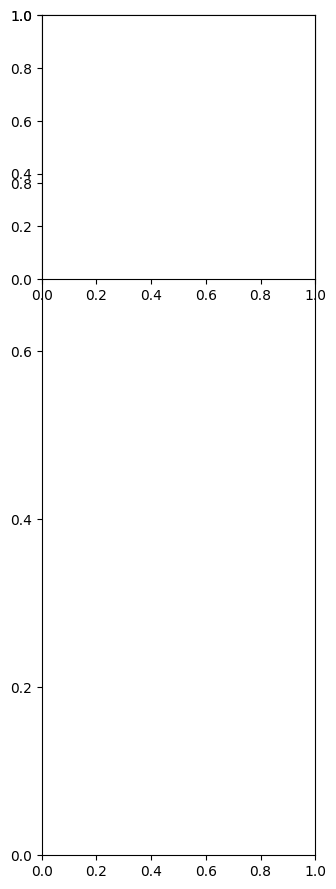

In [60]:

# print(Y_pred[0])
# print(X_test[0])
sample_test = X_test[:5]
print(sample_test.shape)
# sample_test.head()
plt.figure(figsize=(12, 24))
for i in range(5):
    plt.subplot(2,3,i+1)
    
    plt.subplot(6, 3, i+1)
    # plt.imshow()
    plt.xlabel("{}".format(Art_Categories[Y_pred[3*i+2]]))
plt.tight_layout()
plt.show()